In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../data/sales.csv')

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


# 1. Obtaining Datetime objects

<font color='red'>Question:</font> What is the type of **purchase_date**?

In [5]:
type(df.purchase_date)

pandas.core.series.Series

In [6]:
type(df.purchase_date[0])

str

<font color='red'>Assignment:</font> Use **pandas.to_datetime** to **transform df.purchase_date** in to a series of datetime object and assign it to a variable **purchase_date**.

In [9]:
purchase_date = pd.to_datetime(df.purchase_date)

In [10]:
purchase_date.head()

0   2008-12-19
1   1997-09-10
2   2001-09-05
3   2016-12-23
4   2000-01-12
Name: purchase_date, dtype: datetime64[ns]

<font color='red'>Assignment:</font> What is the earliest date in the datetime series.

In [11]:
purchase_date.min()

Timestamp('1996-08-09 00:00:00')

<font color='red'>Assignment:</font> What is the latest date in the datetime series.

In [12]:
purchase_date.max()

Timestamp('2017-10-06 00:00:00')

# 2. Time series

**Example:** Generate time series of **price**.

In [13]:
price = df.price.map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))

In [14]:
price.head()

0    300492.0
1    430570.0
2    213070.0
3    229174.0
4    122659.0
Name: price, dtype: float64

In [15]:
price.index = purchase_date

In [16]:
price.head()

purchase_date
2008-12-19    300492.0
1997-09-10    430570.0
2001-09-05    213070.0
2016-12-23    229174.0
2000-01-12    122659.0
Name: price, dtype: float64

**Example**: Visualize the time series.

<AxesSubplot:xlabel='purchase_date'>

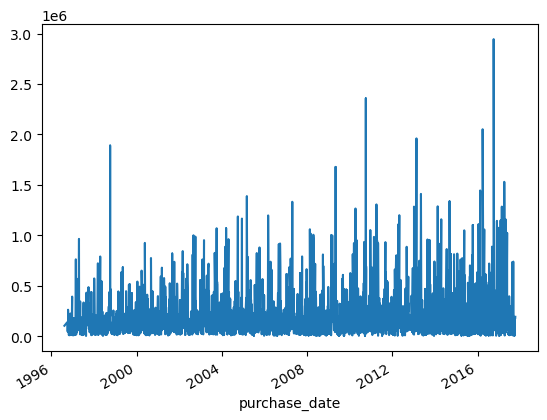

In [17]:
price.dropna().plot()

<font color='red'>Question:</font> Why do we need **dropna()** here?

<AxesSubplot:xlabel='purchase_date'>

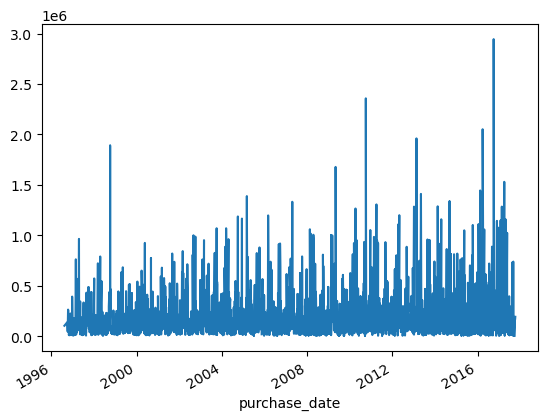

In [18]:
price.plot() #in case there is empty records in the price,still working here without dropna

# 3. Time Series Aggregation

## 3.1 Resample

**Example**: Get montly counts of purchase events.

<AxesSubplot:title={'center':'Monthly Counts'}, xlabel='purchase_date'>

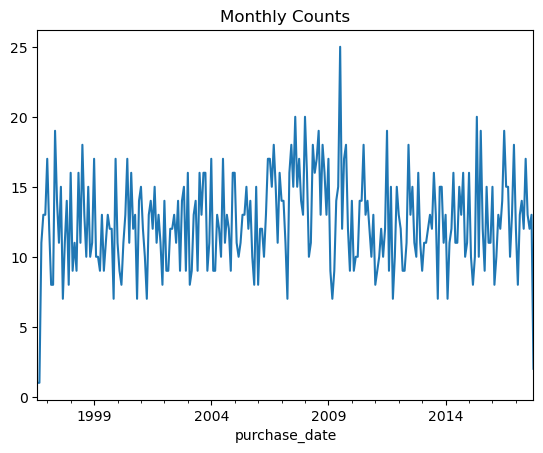

In [19]:
price.resample('M').count().plot(title='Monthly Counts')

<font color='red'>Assignment:</font> Get monthly price mean and median, respectively.

In [20]:
price.resample('M').mean()

purchase_date
1996-08-31    103343.000000
1996-09-30    138381.000000
1996-10-31    105156.818182
1996-11-30     76611.153846
1996-12-31     94739.615385
                  ...      
2017-06-30     93203.647059
2017-07-31    140474.307692
2017-08-31    217683.000000
2017-09-30    117562.153846
2017-10-31    183315.500000
Name: price, Length: 255, dtype: float64

In [21]:
price.resample('M').median()

purchase_date
1996-08-31    103343.0
1996-09-30    138381.0
1996-10-31     65893.0
1996-11-30     66619.0
1996-12-31     80039.0
                ...   
2017-06-30     69378.0
2017-07-31     76832.0
2017-08-31    160995.5
2017-09-30     48057.0
2017-10-31    183315.5
Name: price, Length: 255, dtype: float64

<font color='red'>Assignment:</font> Get bi-weekly price mean and median, respectively.

In [23]:
price.resample('2W').mean()

purchase_date
1996-08-11    103343.000000
1996-08-25              NaN
1996-09-08              NaN
1996-09-22              NaN
1996-10-06     92041.000000
                  ...      
2017-08-13    138621.200000
2017-08-27    274155.714286
2017-09-10    148914.142857
2017-09-24     50454.250000
2017-10-08    162680.750000
Name: price, Length: 553, dtype: float64

In [24]:
price.resample('2W').median()

purchase_date
1996-08-11    103343.0
1996-08-25         NaN
1996-09-08         NaN
1996-09-22         NaN
1996-10-06     92041.0
                ...   
2017-08-13    113128.0
2017-08-27    213864.0
2017-09-10     48057.0
2017-09-24     11656.0
2017-10-08    179167.0
Name: price, Length: 553, dtype: float64

<font color='red'>Assignment:</font> Get monthly **profit** mean and median, respectively.

In [27]:
cost = df.cost.map(lambda x: x if type(x) == float else float(x.strip('$').replace('k', ''))*1000)
price = df.price.map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))
profit = price - cost
profit.index = purchase_date
profit.resample('M').mean()

purchase_date
1996-08-31             NaN
1996-09-30             NaN
1996-10-31   -95299.000000
1996-11-30    53287.000000
1996-12-31    66760.000000
                  ...     
2017-06-30    11728.363636
2017-07-31    10765.300000
2017-08-31    65528.444444
2017-09-30     7084.500000
2017-10-31   -75184.500000
Length: 255, dtype: float64

In [28]:
profit.resample('M').median()

purchase_date
1996-08-31        NaN
1996-09-30        NaN
1996-10-31   -95299.0
1996-11-30    53287.0
1996-12-31    66760.0
               ...   
2017-06-30   -23867.0
2017-07-31    17397.5
2017-08-31    82128.0
2017-09-30    -1756.5
2017-10-31   -75184.5
Length: 255, dtype: float64

## 3.2 Rolling

<font color='red'>Assignment:</font> Get seven-day rolling average of profit.

<AxesSubplot:xlabel='purchase_date'>

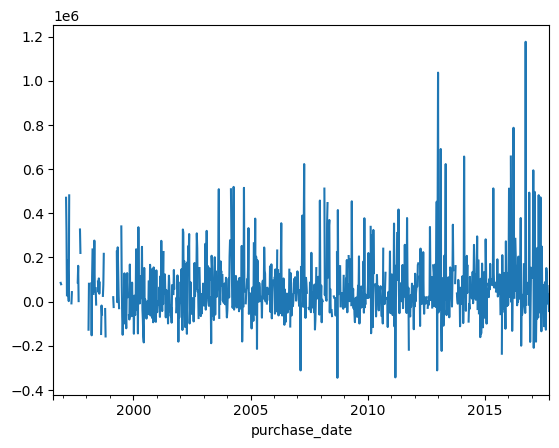

In [54]:
profit.resample('7D').mean().plot() #not really rolling 

<AxesSubplot:title={'center':'Profit 7d rolling'}, xlabel='purchase_date'>

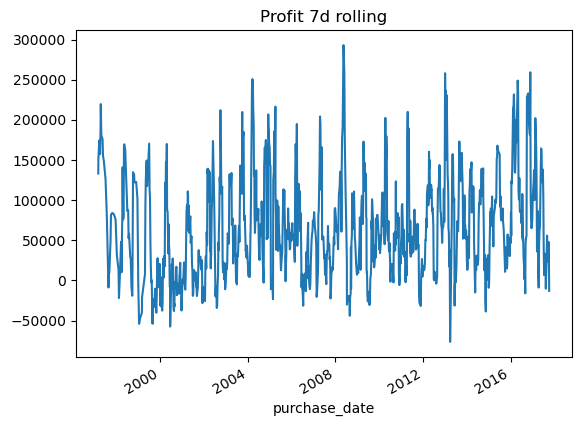

In [67]:
#using reindex
profit_bydate = profit.resample('D').mean()
profit_bydate = profit_bydate[profit_bydate.notnull()]
#profit_bydate.head(-20)
idx = pd.date_range(profit_bydate.index.min(), profit_bydate.index.max())
profit_bydate.reindex(idx, fill_value=0)
profit_7d = profit_bydate.rolling(7).sum() / 7
profit_7d.plot(title = "Profit 7d rolling")

## 3.3 Cumulative

<font color='red'>Assignment:</font> Get cumulative sum of profit.

<AxesSubplot:title={'center':'Profit Cumulation'}, xlabel='purchase_date'>

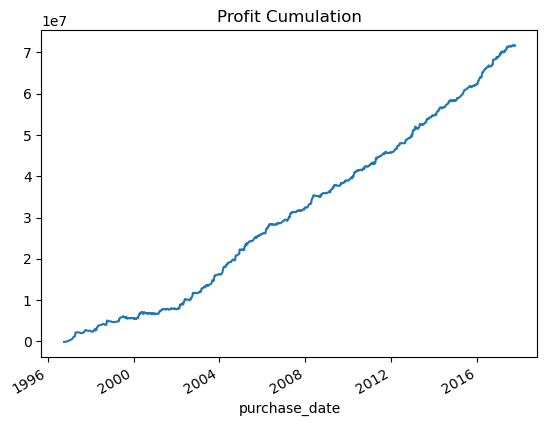

In [68]:
profit_cumsum = profit_bydate.cumsum()
profit_cumsum.plot(title = "Profit Cumulation")

## 3.4 Time features

**Example:** Get weekday from the datetime series.

In [69]:
weekday = purchase_date.dt.weekday

In [70]:
weekday.head()

0    4.0
1    2.0
2    2.0
3    4.0
4    2.0
Name: purchase_date, dtype: float64

In [72]:
weekday.max()

6.0

**Example:** Get averaged price for each weekday.

In [73]:
df_tmp = pd.DataFrame({'price': price.values, 'weekday': weekday})

In [74]:
df_tmp.head()

,price,weekday
0,300492.0,4.0
1,430570.0,2.0
2,213070.0,2.0
3,229174.0,4.0
4,122659.0,2.0


<font color='red'>Question:</font> Why do we need **.values** for **price** here?

In [81]:
price.index = purchase_date
df_tmp = pd.DataFrame({'price': price.values, 'weekday': weekday})
df_tmp.head()
#type(price) #series
#type(price.values) #numpy.ndarray
#Because price also has .index attribute?

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='weekday'>

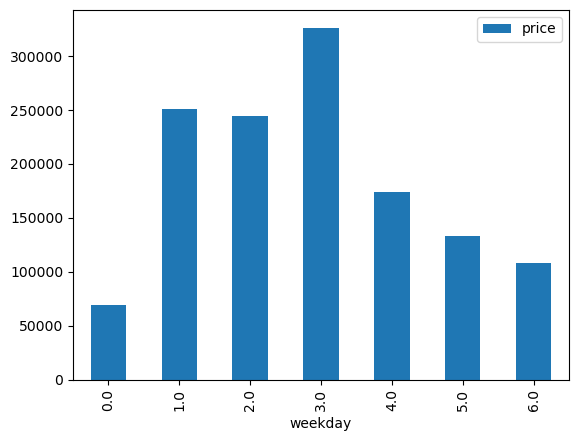

In [82]:
df_tmp.groupby('weekday').mean().plot(kind='bar')

<font color='red'>Assignment:</font> Get profit median for each month.

In [83]:
months = purchase_date.dt.month

In [84]:
months.head()

0    12.0
1     9.0
2     9.0
3    12.0
4     1.0
Name: purchase_date, dtype: float64

In [85]:
df_tmp1 = pd.DataFrame({'price': profit.values, 'months': months})

In [86]:
df_tmp1.head()

,price,months
0,-32508.0,12.0
1,NaN,9.0
2,-56930.0,9.0
3,NaN,12.0
4,25659.0,1.0


<AxesSubplot:xlabel='months'>

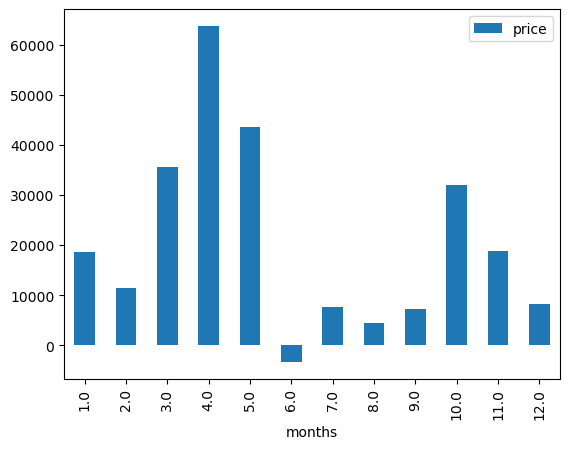

In [87]:
df_tmp1.groupby('months').median().plot(kind='bar')